In [1]:
# import libraries

import yfinance as yf

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import dates
import mplfinance as mpf # -----> For MACD plot
import matplotlib.pyplot as plt
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns
pd.set_option('display.max_columns', None)

In [2]:
tesla = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [4]:
tesla.columns = [col.lower() for col in tesla.columns]
tesla = tesla.rename(columns={'adj close': 'adj_close'})

In [5]:
tesla['color'] = np.where(tesla['adj_close'] >= tesla['open'], 'g', 'r')
tesla['todays_change'] = np.round(tesla['adj_close'] - tesla['open'], 3)
tesla['percent_change'] = np.round(100*(tesla['adj_close'] - tesla['open'])/tesla['open'], 2)

In [6]:
tesla.tail()

,open,high,low,close,adj_close,volume,color,todays_change,percent_change
Date,,,,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,r,-4.22,-1.64
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,g,2.12,0.83
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,g,3.09,1.20
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,r,-10.48,-3.97
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300,r,-6.62,-2.60


In [7]:
print(f"ATH: {tesla['adj_close'].max()}, ATL: {tesla['adj_close'].min()}")

ATH: 409.9700012207031, ATL: 1.053333044052124


In [8]:
tesla.sort_values(by='percent_change', ascending=False).head(10)

,open,high,low,close,adj_close,volume,color,todays_change,percent_change
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,g,0.326,25.74
2010-11-10,1.632000,1.998000,1.603333,1.957333,1.957333,45907500,g,0.325,19.93
2020-02-03,44.912666,52.409332,44.901333,52.000000,52.000000,705975000,g,7.087,15.78
2014-01-14,9.366667,10.800000,9.111333,10.751333,10.751333,414105000,g,1.385,14.78
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200,g,33.460,14.33
2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500,g,3.529,14.13
2018-04-04,16.851999,19.224667,16.799999,19.129333,19.129333,298450500,g,2.277,13.51
2013-07-17,7.101333,8.108000,6.966667,8.016667,8.016667,390435000,g,0.915,12.89
2020-08-31,148.203339,166.713333,146.703339,166.106674,166.106674,355123200,g,17.903,12.08


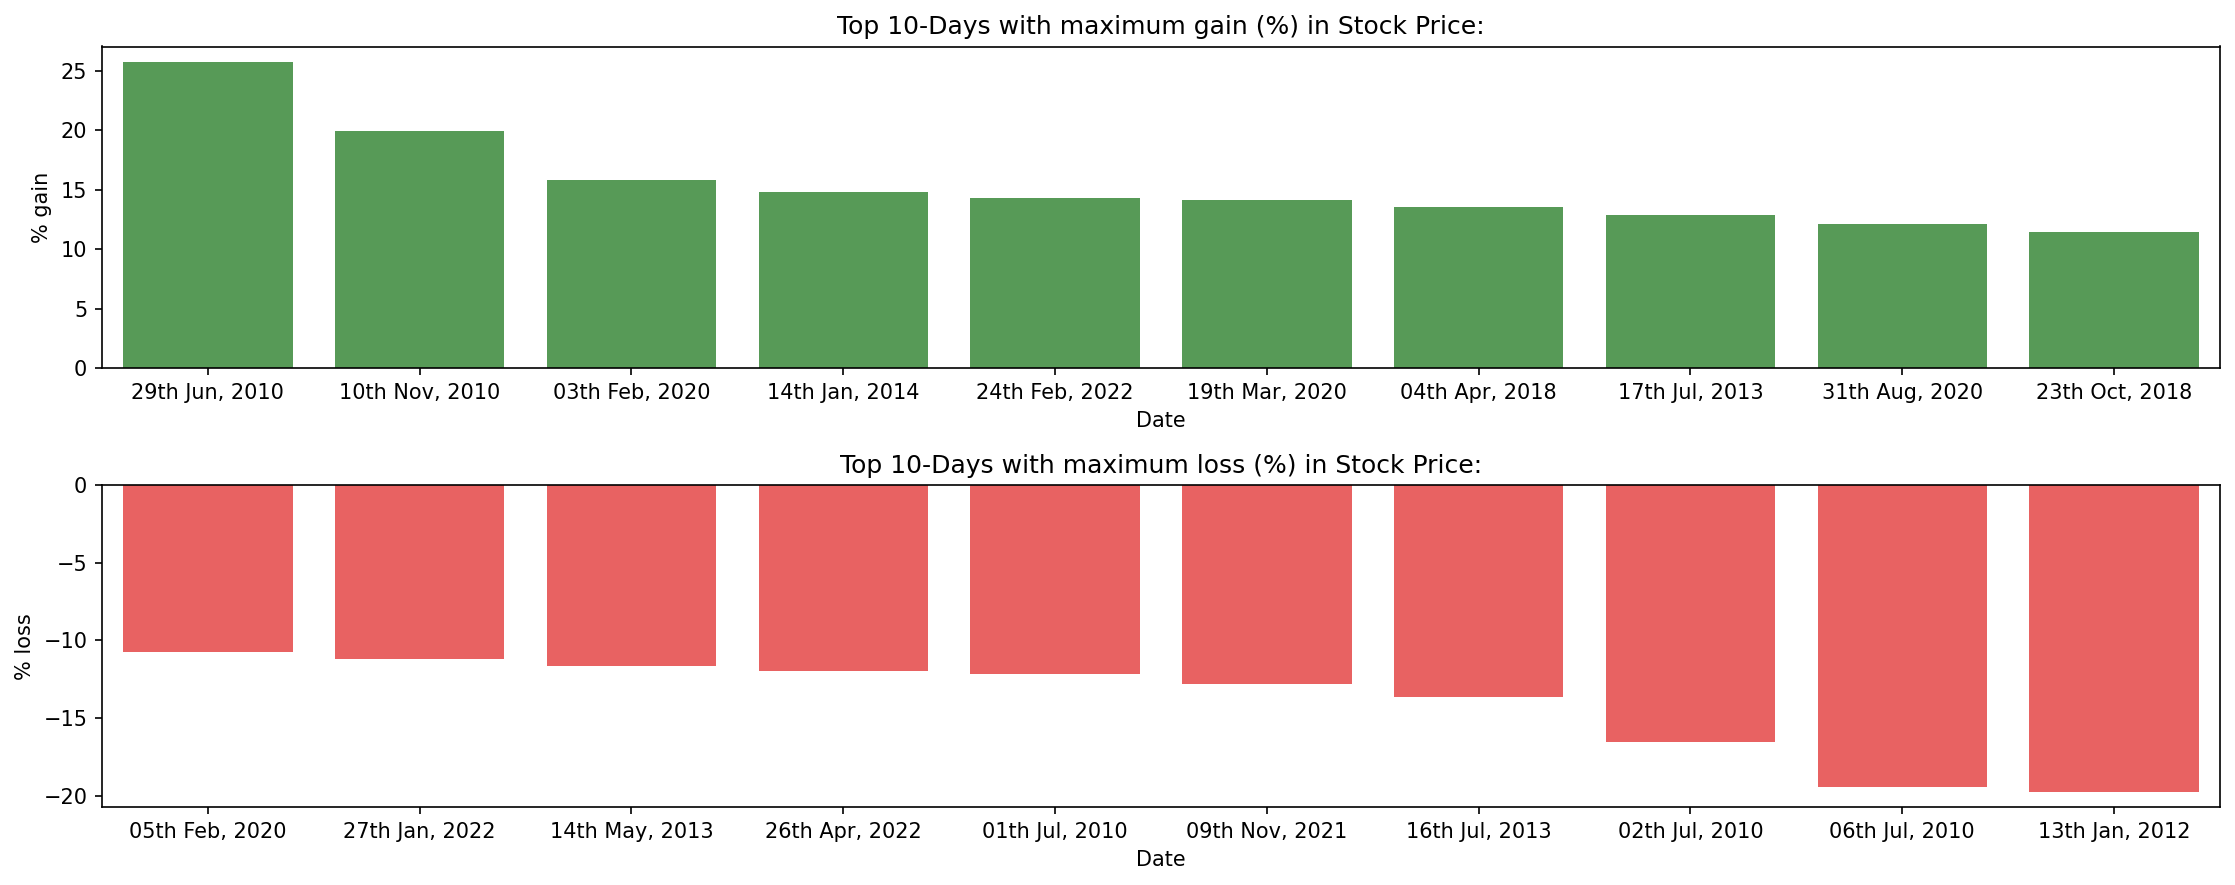

In [9]:
fig, (ax_0, ax_1) = plt.subplots(2, 1, figsize=(15, 6), gridspec_kw={'height_ratios': [3, 3]}, dpi=150)

top_gain = tesla.sort_values(by='percent_change', ascending=False).head(10)
top_loss = tesla.sort_values(by='percent_change', ascending=False).tail(10)

sns.barplot(top_gain, x=top_gain.index.strftime('%dth %b, %Y'), y='percent_change', ax=ax_0, color='g', alpha=0.7)
sns.barplot(top_loss, x=top_loss.index.strftime('%dth %b, %Y'), y='percent_change', ax=ax_1, color='r', alpha=0.7)

ax_0.set_title('Top 10-Days with maximum gain (%) in Stock Price:')
ax_0.set_ylabel('% gain')

ax_1.set_title('Top 10-Days with maximum loss (%) in Stock Price:')
ax_1.set_ylabel('% loss')

plt.tight_layout()
plt.show()

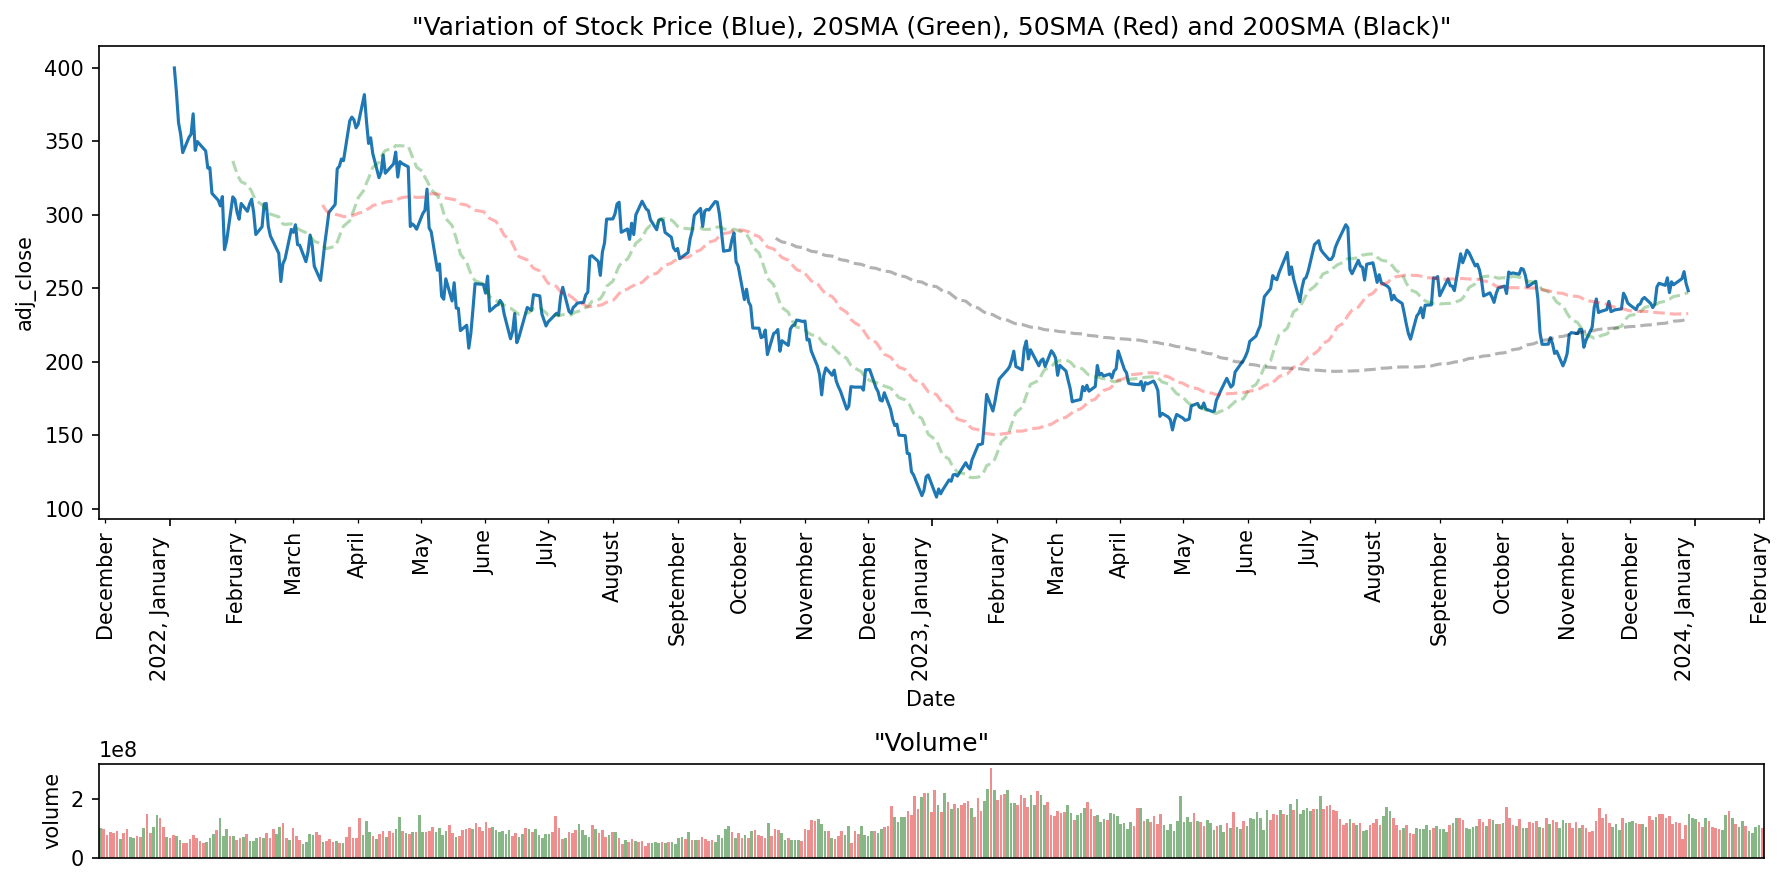

In [10]:
fig, (ax_0, ax_1) = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [5, 1]}, dpi=150)

sns.lineplot(
    data=tesla['2022-01-01':], x=tesla['2022-01-01':].index, y='adj_close', ax=ax_0
)

tesla['2022-01-01':]['adj_close'].rolling(20).mean().plot(ax=ax_0, c='g', ls='--', alpha=0.3, label='20-day MA')
tesla['2022-01-01':]['adj_close'].rolling(50).mean().plot(ax=ax_0, c='r', ls='--', alpha=0.3, label='50-day MA')
tesla['2022-01-01':]['adj_close'].rolling(200).mean().plot(ax=ax_0, c='k', ls='--', alpha=0.3, label='200-day MA')

sns.barplot(
    data=tesla['2022-01-01':], x=tesla['2022-01-01':].index, y='volume', ax=ax_1, 
    palette=tesla['color'], alpha=0.5)


ax_0.xaxis.set_major_locator(dates.YearLocator())
ax_0.xaxis.set_major_formatter(dates.DateFormatter("%Y, %B"))
ax_0.xaxis.set_minor_locator(dates.MonthLocator())
ax_0.xaxis.set_minor_formatter(dates.DateFormatter("%B"))
ax_0.tick_params(axis="x", which="major",rotation=90, pad=5)
ax_0.tick_params(axis="x", which="minor",rotation=90)
ax_0.set_title('"Variation of Stock Price (Blue), 20SMA (Green), 50SMA (Red) and 200SMA (Black)"')

ax_1.get_xaxis().set_visible(False)
ax_1.set_title('"Volume"')

plt.tight_layout()
plt.show()

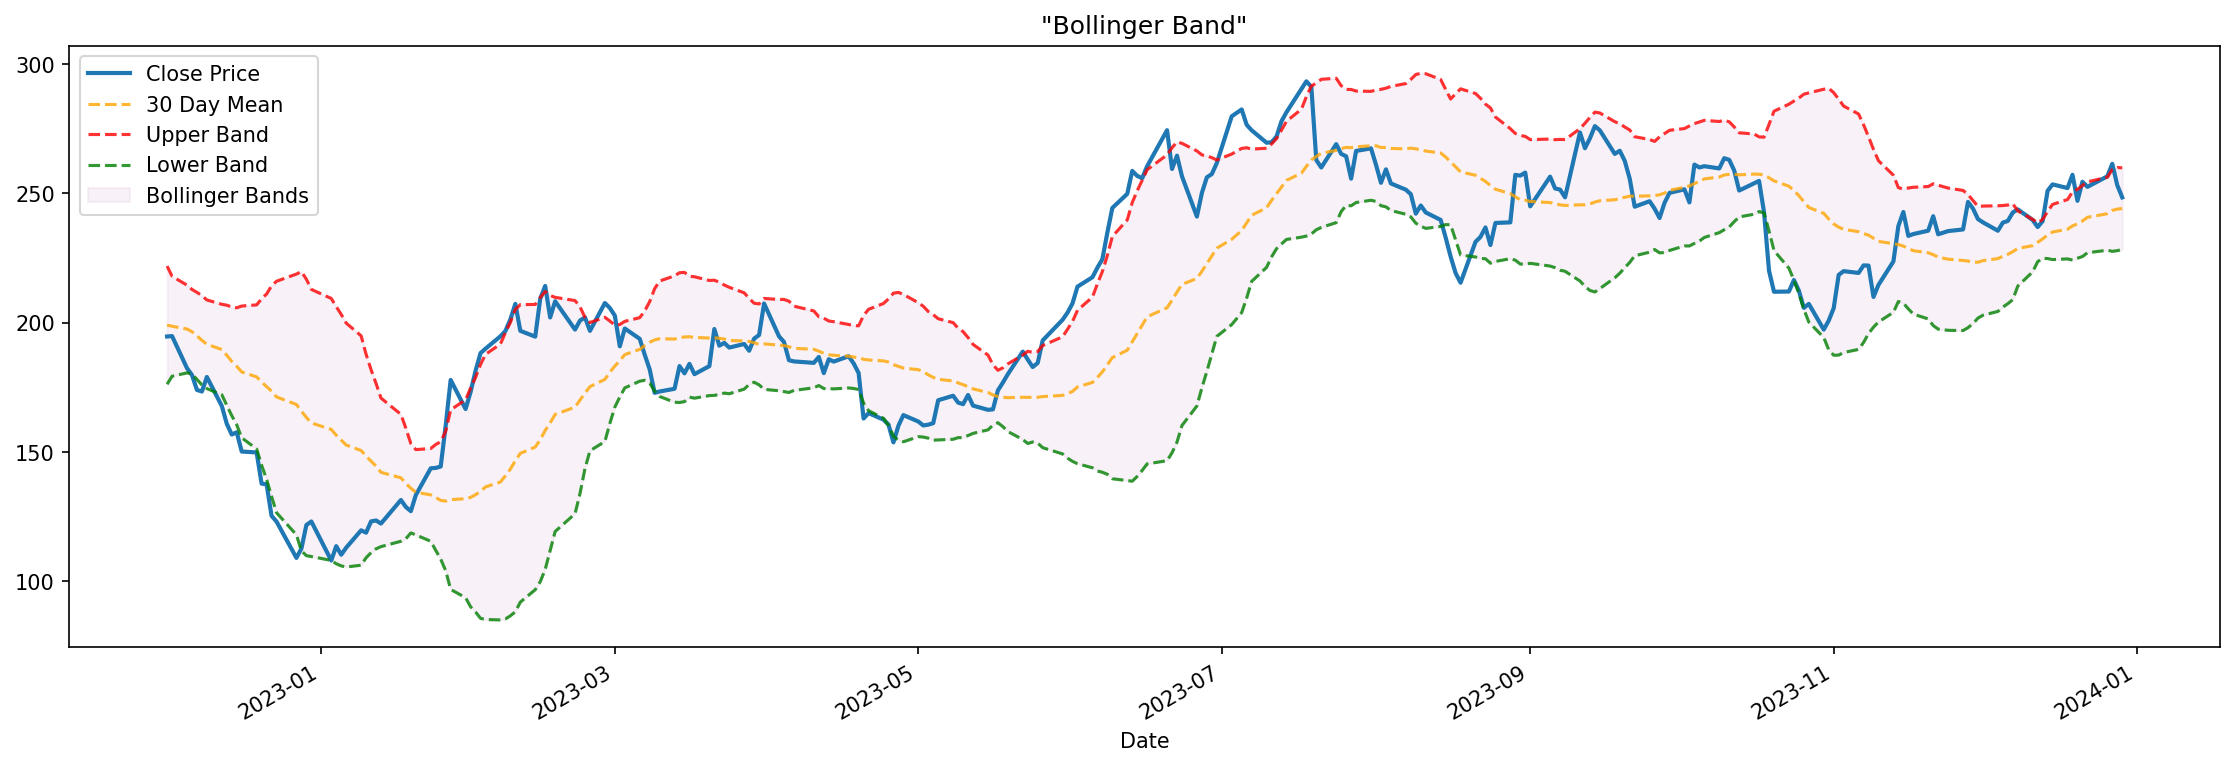

In [11]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=150)

tesla['close: 30 Day Mean'] = tesla['close'].rolling(window=30).mean()
tesla['upper_band'] = tesla['close: 30 Day Mean'] + 2*tesla['close'].rolling(window=20).std()
tesla['lower_band'] = tesla['close: 30 Day Mean'] - 2*tesla['close'].rolling(window=20).std()

tesla['close']['2022-12-01':].plot(ax=ax, label='Close Price', lw=2)
ax.plot(tesla['close: 30 Day Mean']['2022-12-01':], label='30 Day Mean', linestyle='--', color='orange', alpha=0.8)
ax.plot(tesla['upper_band']['2022-12-01':], label='Upper Band', linestyle='--', color='red', alpha=0.8)
ax.plot(tesla['lower_band']['2022-12-01':], label='Lower Band', linestyle='--', color='green', alpha=0.8)

ax.fill_between(
    tesla['lower_band']['2022-12-01':].index, 
    tesla['lower_band']['2022-12-01':], 
    tesla['upper_band']['2022-12-01':], 
    color='purple', alpha=0.05, label='Bollinger Bands'
)

plt.tight_layout()
plt.title('"Bollinger Band"')
plt.legend()
plt.show()

Time resampling:

Link: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

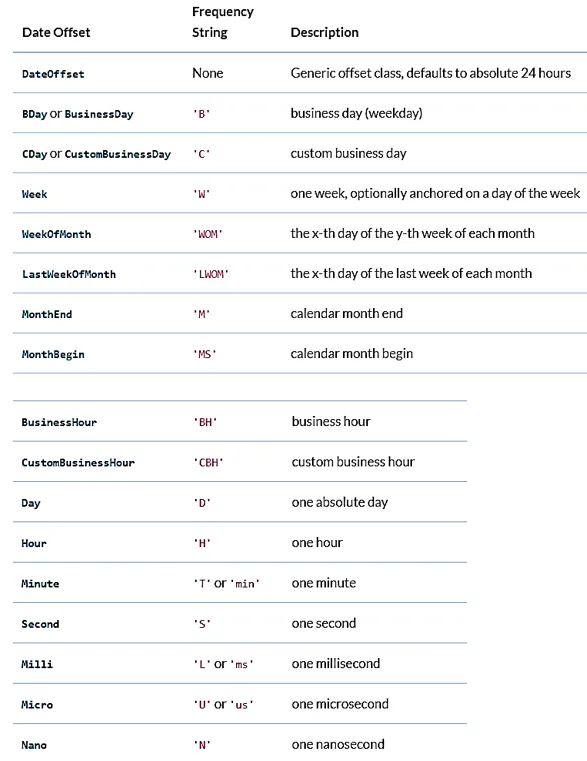

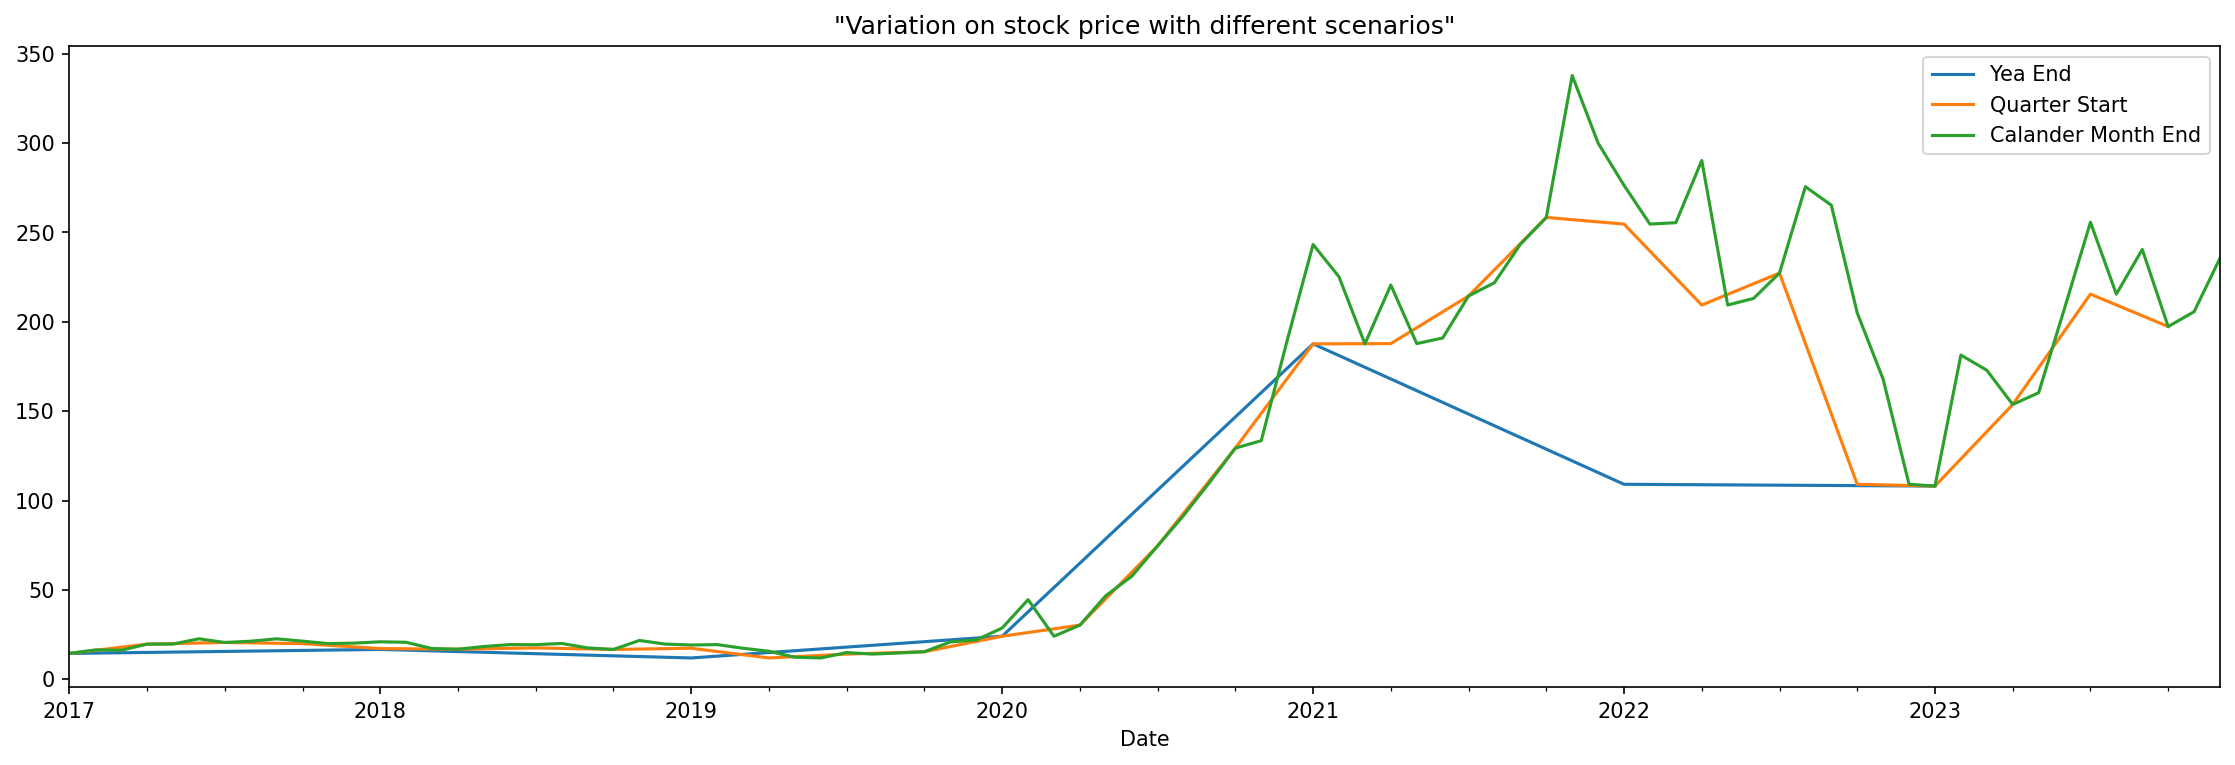

In [12]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=150)

tesla['2017-01-01':].resample(rule='A').min()['adj_close'].plot(ax=ax, label='Yea End')
tesla['2017-01-01':].resample(rule='QS').min()['adj_close'].plot(ax=ax, label='Quarter Start')
tesla['2017-01-01':].resample(rule='M').min()['adj_close'].plot(ax=ax, label='Calander Month End')

plt.tight_layout()
plt.title('"Variation on stock price with different scenarios"')
plt.legend()
plt.show()

In [13]:
tesla_info = yf.Ticker('TSLA')

In [14]:
tesla_info.financials.T

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Total Operating Income As Reported,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Average Dilution Earnings,Net Income Common Stockholders,Net Income,Minority Interests,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Other Income Expense,Other Non Operating Income Expenses,Special Income Charges,Restructuring And Mergern Acquisition,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2022-12-31,-14080000.0,0.08,17833000000.0,-176000000.0,-176000000.0,12583000000.0,3747000000.0,60609000000.0,17657000000.0,13910000000.0,106000000.0,191000000.0,297000000.0,12744920000.0,12583000000.0,67630000000.0,13656000000.0,3475000000.0,3130000000.0,3.62,4.02,12584000000.0,1000000.0,12583000000.0,12583000000.0,-4000000.0,12587000000.0,12587000000.0,1132000000.0,13719000000.0,-219000000.0,-43000000.0,-176000000.0,176000000.0,106000000.0,191000000.0,297000000.0,13832000000.0,7021000000.0,3075000000.0,3946000000.0,20853000000.0,60609000000.0,81462000000.0,81462000000.0
2021-12-31,2970000.0,0.11,9598000000.0,27000000.0,27000000.0,5519000000.0,2911000000.0,40217000000.0,9625000000.0,6714000000.0,-315000000.0,371000000.0,56000000.0,5494970000.0,5519000000.0,47327000000.0,-6523000000.0,3387000000.0,2958000000.0,1.633333,1.866667,5519000000.0,NaN,5519000000.0,5519000000.0,-125000000.0,5644000000.0,5644000000.0,699000000.0,6343000000.0,162000000.0,135000000.0,27000000.0,-27000000.0,-315000000.0,371000000.0,56000000.0,6496000000.0,7110000000.0,2593000000.0,4517000000.0,13606000000.0,40217000000.0,53823000000.0,53823000000.0
2020-12-31,0.0,0.25,4224000000.0,0.0,0.0,690000000.0,2322000000.0,24906000000.0,4224000000.0,1902000000.0,-718000000.0,748000000.0,30000000.0,690000000.0,690000000.0,29542000000.0,1994000000.0,3249000000.0,2799000000.0,0.213333,0.246667,690000000.0,NaN,690000000.0,690000000.0,-172000000.0,862000000.0,862000000.0,292000000.0,1154000000.0,-122000000.0,-122000000.0,0.0,0.0,-718000000.0,748000000.0,30000000.0,1994000000.0,4636000000.0,1491000000.0,3145000000.0,6630000000.0,24906000000.0,31536000000.0,31536000000.0


In [15]:
tesla_info.actions

,Dividends,Stock Splits
Date,,
2020-08-31 00:00:00-04:00,0.0,5.0
2022-08-25 00:00:00-04:00,0.0,3.0
